In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.5f}'.format
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-data/housingData_7R.xlsx


In [ ]:
#pd.set_option('display.max_rows', 20)

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 920 kB/s            


In [7]:
data = pd.read_excel("/kaggle/input/housing-data/housingData_7R.xlsx")

In [8]:
df = data.copy()

In [ ]:
#data = df.copy()

In [9]:
data.head()

,Unnamed: 0,adID,adDealType,adCanton,adZipCode,adCity,adPublishedDate,adAvailableDate,adPriceText,adDescription,adLangDetected,adNumRooms,adFloor,adYearOfConstruction,adNumApartments,adFloor.1,adNumApartments.1,adLivingSpace,adBuildingArea,adUsefulArea,adCoordE,adCoordN
0,0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130
1,1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843
2,2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906
3,3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595
4,4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414


In [10]:
data.shape

(582669, 22)

In [11]:
data.columns

Index(['Unnamed: 0', 'adID', 'adDealType', 'adCanton', 'adZipCode', 'adCity',
       'adPublishedDate', 'adAvailableDate', 'adPriceText', 'adDescription',
       'adLangDetected', 'adNumRooms', 'adFloor', 'adYearOfConstruction',
       'adNumApartments', 'adFloor.1', 'adNumApartments.1', 'adLivingSpace',
       'adBuildingArea', 'adUsefulArea', 'adCoordE', 'adCoordN'],
      dtype='object')

In [12]:
data = data.drop('Unnamed: 0', axis = 1)

In [13]:
data.describe(include = "all")

,adID,adDealType,adCanton,adZipCode,adCity,adPublishedDate,adAvailableDate,adPriceText,adDescription,adLangDetected,adNumRooms,adFloor,adYearOfConstruction,adNumApartments,adFloor.1,adNumApartments.1,adLivingSpace,adBuildingArea,adUsefulArea,adCoordE,adCoordN
count,582669,582669.00000,582669,582668.00000,535442,582669,582669,582669,582646,582669,582669,582669,582669,19549.00000,582669,19549.00000,582669,57224,105643,582669.00000,582669.00000
unique,582669,NaN,7,NaN,2148,2135,700,9147,441161,4,100,56,520,NaN,56,NaN,1363,3602,1643,NaN,NaN
top,A1,NaN,ZH,NaN,Zürich,2021-08-13,nach Vereinbarung,On request,None,de,None,not available,not available,NaN,not available,NaN,not available,"1,000",100,NaN,NaN
freq,1,NaN,144098,NaN,36322,10281,234256,27155,15619,295370,109048,273739,369297,NaN,273739,NaN,201091,658,2203,NaN,NaN
mean,NaN,12.78479,NaN,4782.51585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22155,NaN,9.22155,NaN,NaN,NaN,7.84939,46.80437
std,NaN,4.48251,NaN,2821.55953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.42858,NaN,12.42858,NaN,NaN,NaN,2.58816,0.67508
min,NaN,10.00000,NaN,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,1.00000,NaN,NaN,NaN,0.00000,-141.54182
25%,NaN,10.00000,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,NaN,2.00000,NaN,NaN,NaN,7.05056,46.46260
50%,NaN,10.00000,NaN,4950.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00000,NaN,6.00000,NaN,NaN,NaN,7.95761,46.83534
75%,NaN,20.00000,NaN,6987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00000,NaN,12.00000,NaN,NaN,NaN,8.65123,47.26299


In [14]:
data['adDescription'].head()

0    Appartement avec beaucoup de charme à louer à ...
1    Die Highlights:<br />» Gut geschnittener Büror...
2    Für diese Wohnung suchen wir ein nettes Paar (...
3    <h3>Chiasso</h3><p><p>Si affitta in pieno a ce...
4    Attico mansardato, posto in elegante palazzina...
Name: adDescription, dtype: object

In [15]:
data['adDealType'].value_counts()

10    420408
20    162261
Name: adDealType, dtype: int64

In [16]:
data['Deal_Type'] = data['adDealType'].copy()

In [17]:
target_map = {
    10: 'rental',
    20: 'sell'}

data.Deal_Type.replace(target_map, inplace = True)

In [18]:
data['Deal_Type'].head()

0    rental
1    rental
2    rental
3    rental
4      sell
Name: Deal_Type, dtype: object

In [19]:
data.columns

Index(['adID', 'adDealType', 'adCanton', 'adZipCode', 'adCity',
       'adPublishedDate', 'adAvailableDate', 'adPriceText', 'adDescription',
       'adLangDetected', 'adNumRooms', 'adFloor', 'adYearOfConstruction',
       'adNumApartments', 'adFloor.1', 'adNumApartments.1', 'adLivingSpace',
       'adBuildingArea', 'adUsefulArea', 'adCoordE', 'adCoordN', 'Deal_Type'],
      dtype='object')

In [20]:
len(data.columns)

22

In [21]:
original_col = data.columns

new_col = ['ID', 'DealType', 'Canton', 'ZipCode',
           'City','PublishedDate', 'AvailableDate', 'PriceText', 
           'Description', 'LangDetected', 'NumRooms', 'Floor', 
           'YearOfConstruction', 'NumApartments', 'Floor1', 
           'NumApartments1', 'LivingSpace', 'BuildingArea', 
           'UsefulArea', 'CoordE', 'CoordN' ,'Deal_Type']

data = data.rename(columns=dict(zip(original_col,new_col)))

data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,NumApartments,Floor1,NumApartments1,LivingSpace,BuildingArea,UsefulArea,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414,sell


In [ ]:
# replace all column names (in place)
#new_cols = [‘column_x’, ‘column_y’, ‘column_z’]
#df.columns = new_cols

## EDA

In [22]:
data.head()

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,NumApartments,Floor1,NumApartments1,LivingSpace,BuildingArea,UsefulArea,CoordE,CoordN,Deal_Type
0,A1,10,JU,2954.00000,Asuel,2020-12-16,not available,"CHF 1,050",Appartement avec beaucoup de charme à louer à ...,fr,3.5,not available,not available,NaN,not available,NaN,80,NaN,NaN,7.21142,47.40130,rental
1,A10,10,ZH,8053.00000,Zürich,2020-11-19,nach Vereinbarung,"CHF 4,048",Die Highlights:<br />» Gut geschnittener Büror...,de,None,EG,1992,NaN,EG,NaN,not available,NaN,145,8.58706,47.35843,rental
2,A100,10,ZH,8902.00000,Urdorf,2021-01-20,sofort,"CHF 1,061",Für diese Wohnung suchen wir ein nettes Paar (...,de,3,3. Stock,not available,NaN,3. Stock,NaN,57,NaN,NaN,8.43089,47.37906,rental
3,A10000,10,TI,6830.00000,Chiasso,2020-10-16,sofort,"CHF 2,250",<h3>Chiasso</h3><p><p>Si affitta in pieno a ce...,it,10,2. Stock,not available,NaN,2. Stock,NaN,190,NaN,NaN,9.03179,45.83595,rental
4,A100001,20,TI,6818.00000,Melano,2020-07-17,sofort,"CHF 2,150,000","Attico mansardato, posto in elegante palazzina...",it,5.5,3. Stock,2012,NaN,3. Stock,NaN,163,NaN,388,8.98268,45.92414,sell


In [23]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'NumApartments', 'Floor1',
       'NumApartments1', 'LivingSpace', 'BuildingArea', 'UsefulArea', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

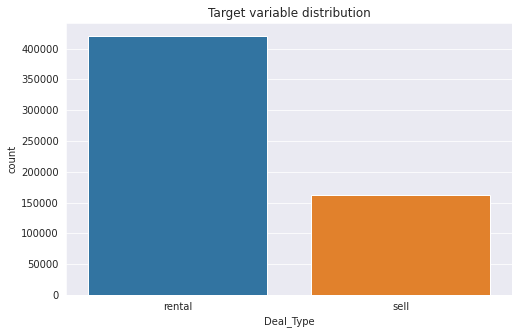

In [24]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(data['Deal_Type'])
plt.title('Target variable distribution')
plt.show()

In [25]:
data.shape

(582669, 22)

In [26]:
data.isnull().sum().sort_values(ascending = False)

NumApartments         563120
NumApartments1        563120
BuildingArea          525445
UsefulArea            477026
City                   47227
Description               23
ZipCode                    1
ID                         0
CoordN                     0
CoordE                     0
LivingSpace                0
Floor1                     0
Floor                      0
YearOfConstruction         0
DealType                   0
NumRooms                   0
LangDetected               0
PriceText                  0
AvailableDate              0
PublishedDate              0
Canton                     0
Deal_Type                  0
dtype: int64

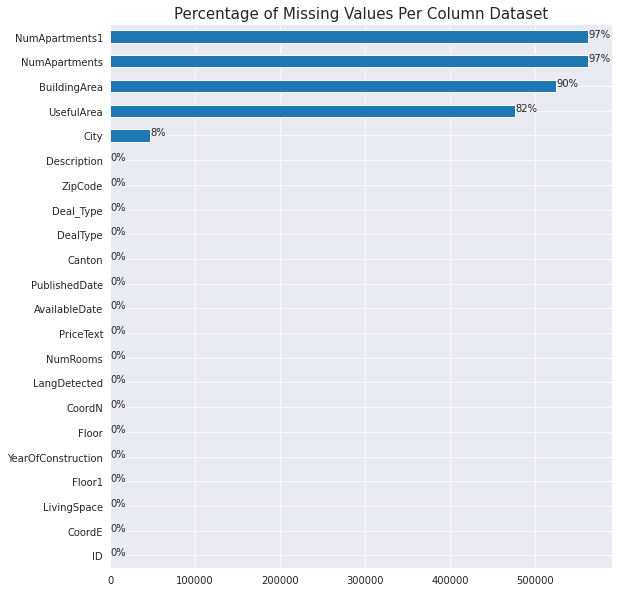

In [27]:
#Plot missing values in data
ax = data.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column Dataset', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

## Treating Missing Values and Outliers

In [28]:
data.isnull().sum().sort_values(ascending=False)

NumApartments         563120
NumApartments1        563120
BuildingArea          525445
UsefulArea            477026
City                   47227
Description               23
ZipCode                    1
ID                         0
CoordN                     0
CoordE                     0
LivingSpace                0
Floor1                     0
Floor                      0
YearOfConstruction         0
DealType                   0
NumRooms                   0
LangDetected               0
PriceText                  0
AvailableDate              0
PublishedDate              0
Canton                     0
Deal_Type                  0
dtype: int64

In [29]:
mis_columns = ['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea' ]

In [30]:
data.corr()

,DealType,ZipCode,NumApartments,NumApartments1,CoordE,CoordN
DealType,1.00000,-0.06292,-0.16487,-0.16487,0.00941,-0.27611
ZipCode,-0.06292,1.00000,0.23040,0.23040,0.32383,0.22359
NumApartments,-0.16487,0.23040,1.00000,1.00000,0.22231,-0.03104
NumApartments1,-0.16487,0.23040,1.00000,1.00000,0.22231,-0.03104
CoordE,0.00941,0.32383,0.22231,0.22231,1.00000,-0.57470
CoordN,-0.27611,0.22359,-0.03104,-0.03104,-0.57470,1.00000


In [31]:
data['NumApartments'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: NumApartments, dtype: float64

In [32]:
data['NumApartments'].value_counts()

1.00000     3112
2.00000     2418
3.00000     1648
6.00000     1622
4.00000     1349
            ... 
93.00000       1
70.00000       1
65.00000       1
99.00000       1
38.00000       1
Name: NumApartments, Length: 74, dtype: int64

In [33]:
mis_columns

['NumApartments', 'NumApartments1', 'BuildingArea', 'UsefulArea']

In [34]:
NumApartments = data['NumApartments'].copy()
BuildingArea = data['BuildingArea'].copy()
UsefulArea = data['UsefulArea'].copy()

In [35]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'NumApartments', 'Floor1',
       'NumApartments1', 'LivingSpace', 'BuildingArea', 'UsefulArea', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers = detect_outliers_zscore(data['adNumApartments.1'])
print("Outliers from Z-scores method: ", sample_outliers)

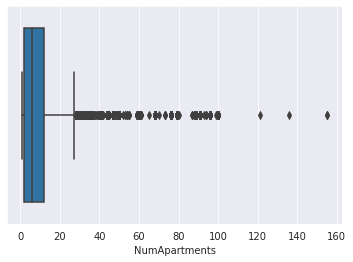

In [36]:
sns.boxplot(data['NumApartments'])
plt.show()

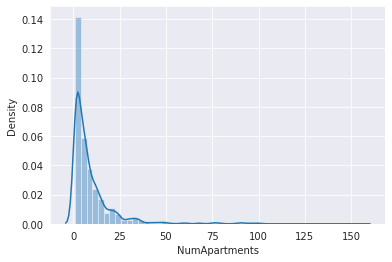

In [37]:
sns.distplot(data['NumApartments'])
plt.show()

In [38]:
data = data.drop(columns = mis_columns, axis = 1)

In [39]:
data.columns

Index(['ID', 'DealType', 'Canton', 'ZipCode', 'City', 'PublishedDate',
       'AvailableDate', 'PriceText', 'Description', 'LangDetected', 'NumRooms',
       'Floor', 'YearOfConstruction', 'Floor1', 'LivingSpace', 'CoordE',
       'CoordN', 'Deal_Type'],
      dtype='object')

In [40]:
data.isnull().sum().any()

True

In [41]:
data.isnull().sum().sort_values(ascending = False)

City                  47227
Description              23
ZipCode                   1
ID                        0
Floor                     0
CoordN                    0
CoordE                    0
LivingSpace               0
Floor1                    0
YearOfConstruction        0
LangDetected              0
NumRooms                  0
DealType                  0
PriceText                 0
AvailableDate             0
PublishedDate             0
Canton                    0
Deal_Type                 0
dtype: int64

In [45]:
data['City'].value_counts()

Zürich               36322
Lausanne             19709
Lugano               16873
Bern                 14397
Luzern               11527
                     ...  
Vouvry                   1
Saicourt                 1
Gresso                   1
Wiler bei Seedorf        1
Wilen b. Wollerau        1
Name: City, Length: 2148, dtype: int64

In [ ]:
# ptype_encode = {}
# ptype_encode_values = range(16,0,-1)
# for i,k in zip(type_count.index,ptype_encode_values):
#     ptype_encode[i]=k
# ptype_encode

# data['adCity'] = data['adCity'].map(ptype_encode)

In [46]:
data['City'].head(20)

0                  Asuel
1                 Zürich
2                 Urdorf
3                Chiasso
4                 Melano
5              Novazzano
6                   Cugy
7                 Lugano
8               Neuenegg
9             Bellinzona
10                Zürich
11                Zürich
12             Steinmaur
13               Gunzwil
14                Zürich
15                   NaN
16    Gerra (Gambarogno)
17               Bottens
18                Zürich
19                Lugano
Name: City, dtype: object

In [47]:
City = data['City'].copy()

In [51]:
data['City'].describe()

count     535442
unique      2148
top       Zürich
freq       36322
Name: City, dtype: object

In [52]:
data.describe(include = 'all')

,ID,DealType,Canton,ZipCode,City,PublishedDate,AvailableDate,PriceText,Description,LangDetected,NumRooms,Floor,YearOfConstruction,Floor1,LivingSpace,CoordE,CoordN,Deal_Type
count,582669,582669.00000,582669,582668.00000,535442,582669,582669,582669,582646,582669,582669,582669,582669,582669,582669,582669.00000,582669.00000,582669
unique,582669,NaN,7,NaN,2148,2135,700,9147,441161,4,100,56,520,56,1363,NaN,NaN,2
top,A1,NaN,ZH,NaN,Zürich,2021-08-13,nach Vereinbarung,On request,None,de,None,not available,not available,not available,not available,NaN,NaN,rental
freq,1,NaN,144098,NaN,36322,10281,234256,27155,15619,295370,109048,273739,369297,273739,201091,NaN,NaN,420408
mean,NaN,12.78479,NaN,4782.51585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.84939,46.80437,NaN
std,NaN,4.48251,NaN,2821.55953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58816,0.67508,NaN
min,NaN,10.00000,NaN,1000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,-141.54182,NaN
25%,NaN,10.00000,NaN,1800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.05056,46.46260,NaN
50%,NaN,10.00000,NaN,4950.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.95761,46.83534,NaN
75%,NaN,20.00000,NaN,6987.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.65123,47.26299,NaN


In [ ]:
#sns.scatterplot(x = data['City'], y = data['PriceText'])
plt.show()

In [ ]:
sns.distplot(data['PriceText'])
plt.show()

In [ ]:
#data['asUsefulArea'] = data['adUsefulArea'].replace(',','',regex = True,)
#df = df.replace(',','', regex=True)

In [ ]:
#data['adUsefulArea'] = data['adUsefulArea'].astype('float64')
#data['adUsefulArea'] = data['adUsefulArea'].apply(pd.to_numeric)
#df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [ ]:
data.columns

In [ ]:
data.columns

## Things to try out

* **data = data.sort_values(by=['adPublishedDate']).reset_index(drop=True)**
* Trying to sort the data by dates... 'adPublishedDate', 'adAvailableDate'
* How many days is between the published date and available date
* Extract days and month from the date columns

In [ ]:
#Remember this for some visualization
count_plot = sns.catplot(x="adNumApartments.1", kind="count" ,data=data, hue="DealType")
#plt.hist(data['adNumApartments.1'])
plt.show()